#### Here we are using heart disease dataset. 
The "target" column refers to the presence of heart disease in the patient or not. 
Its columns are described as :                                     
'age' in years, sex (1 = male; 0 = female), cp : chest pain type, trestbps : resting blood pressure, 
chol : serum cholestoral in mg/dl, fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false), 
restecg : resting electrocardiographic results, thalach : maximum heart rate achieved, 
exang : exercise induced angina (1 = yes; 0 = no), oldpeak : ST depression induced by exercise relative to rest, 
slope : the slope of the peak exercise ST segment, ca : number of major vessels (0-3) colored by flourosopy, 
thal : 3 = normal; 6 = fixed defect; 7 = reversable defect , target : 1 or 0

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier        # decision tree classifier

#### Dataset from Kaggle : https://www.kaggle.com/zhaoyingzhu/heartcsv

In [2]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dataset.isnull().sum()    # checks all columns is there any NaN values
dataset.info()           # gives all information about dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


## Creating Tree (Decision tree) to visualize

In [4]:
X = dataset.drop('target', axis=1)       # we 1st divide dataset into independent and dependent features , X : independet
y = dataset.target                        # y : dependent features


X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0, test_size=0.25)   # training and testing data

model = DecisionTreeClassifier()   # creating model to fit and predict
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
features = list(X)     # Also convert independent features values into list to form graph

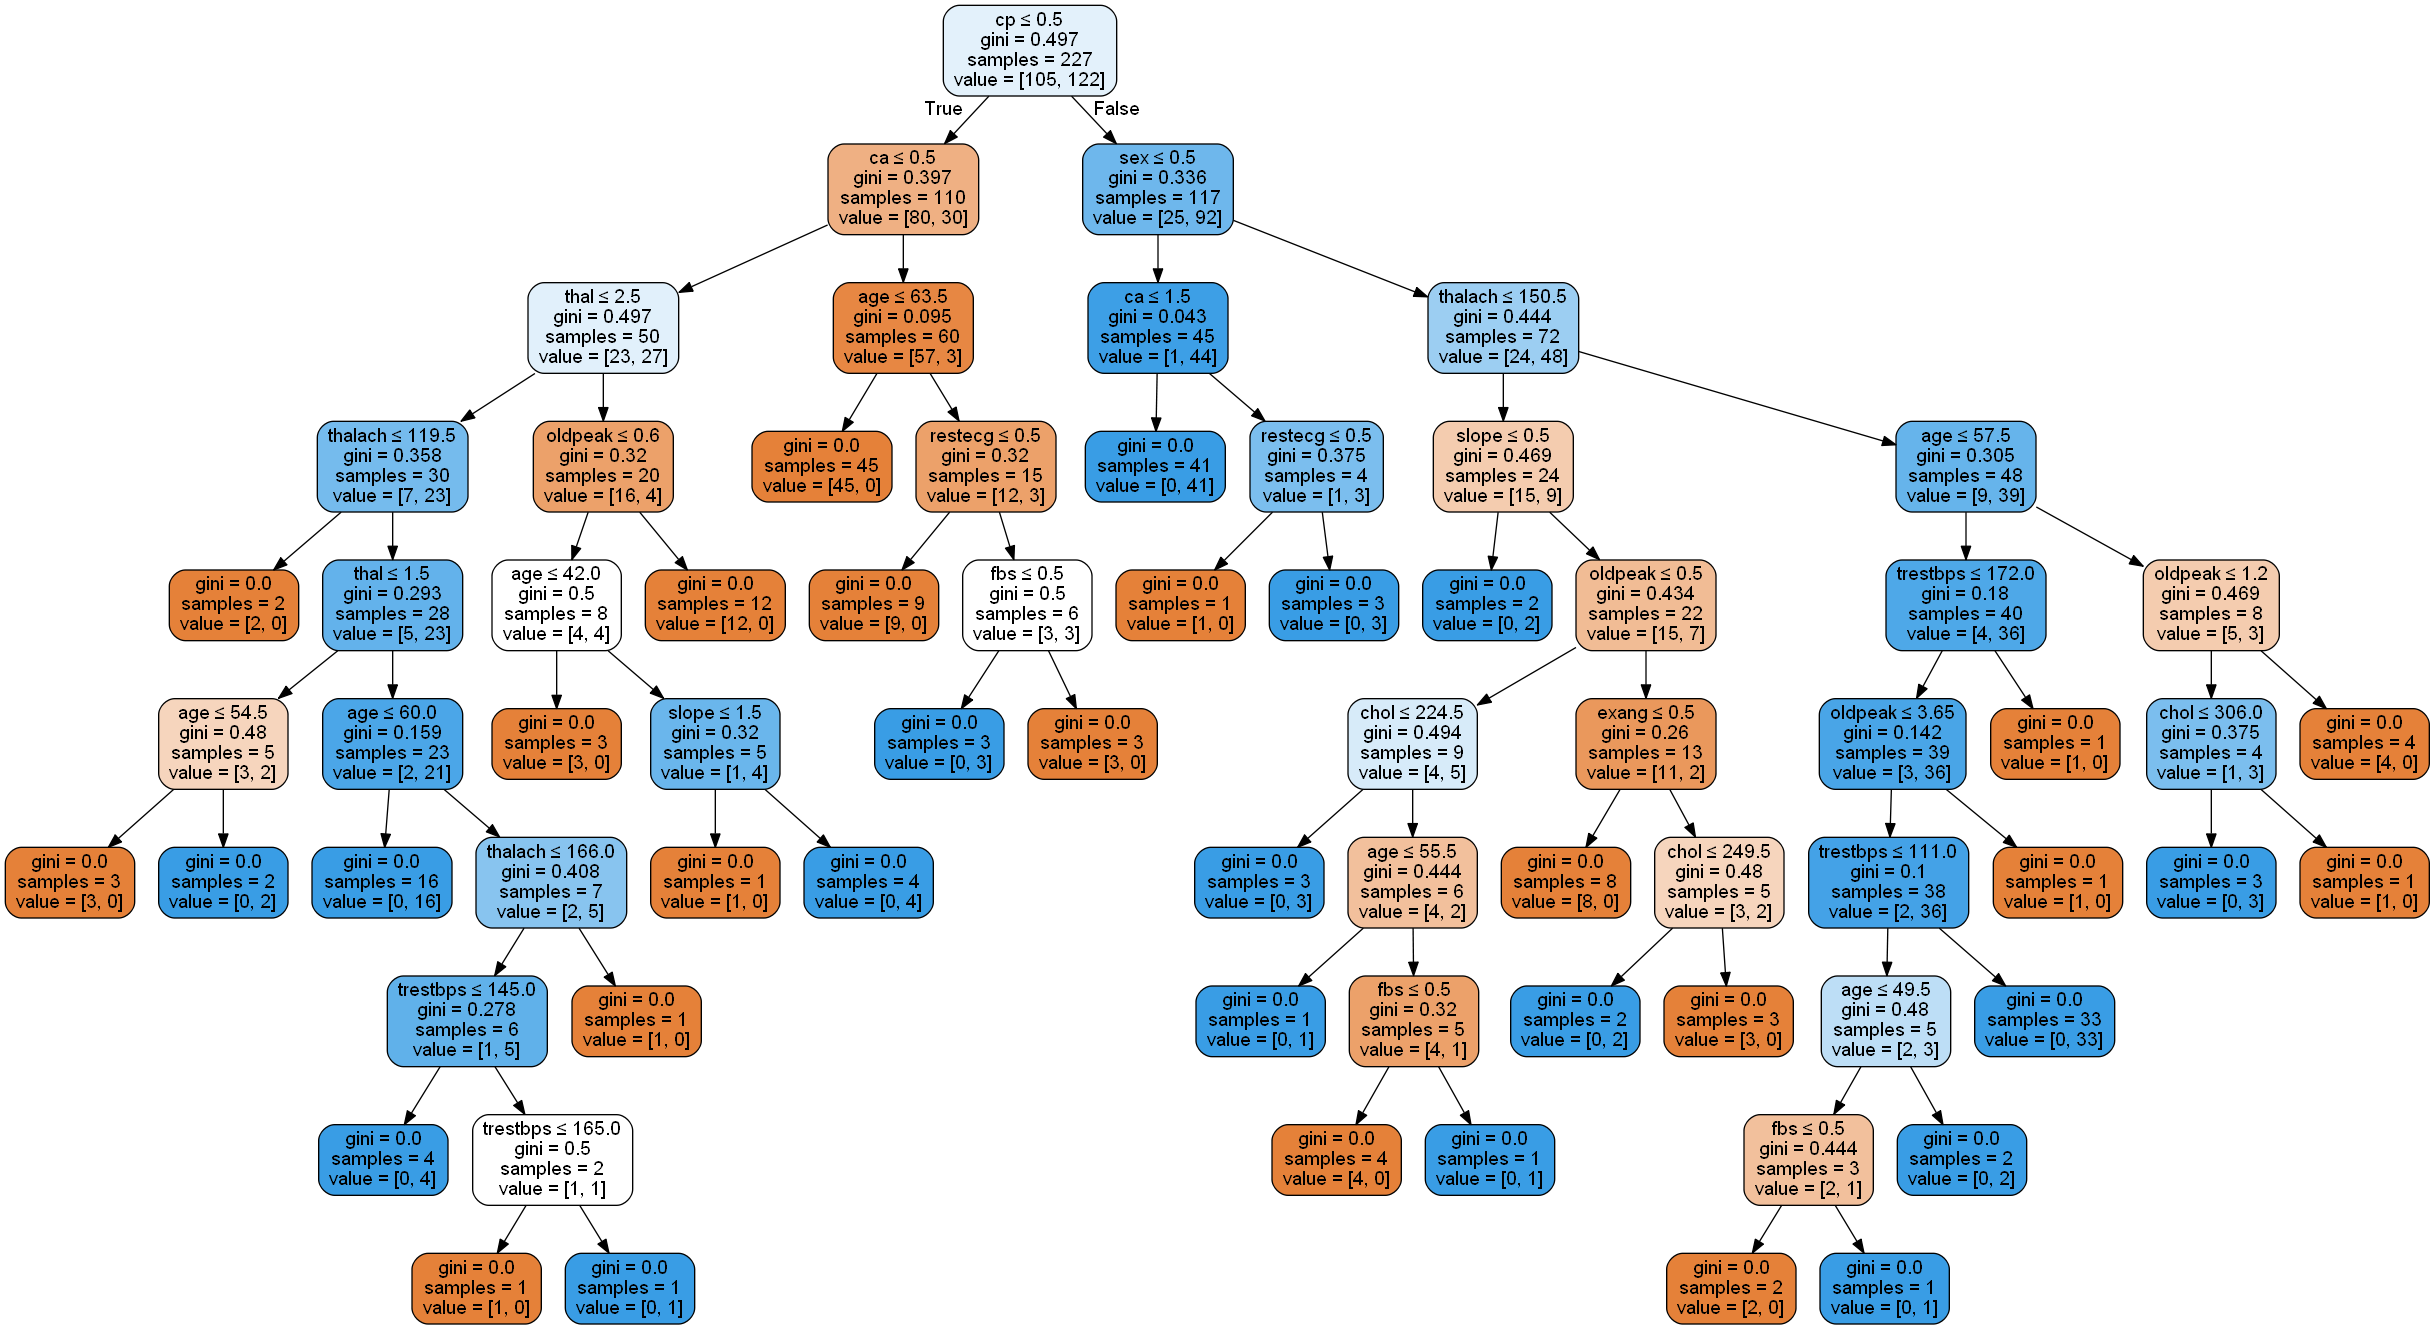

In [6]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(model, out_file=dot_data, feature_names=features, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<Figure size 1440x1080 with 0 Axes>

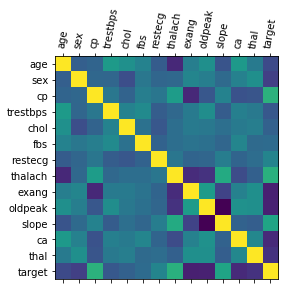

In [7]:
plt.figure(figsize=(20,15))
plt.matshow(dataset.corr())
plt.xticks(np.arange(dataset.shape[1]), dataset.columns, rotation=80)
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.show()

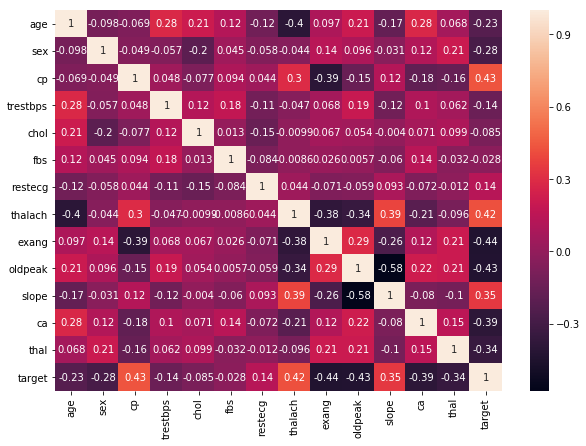

In [8]:
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,7))
sns.heatmap(dataset[top_corr_features].corr(), annot=True)

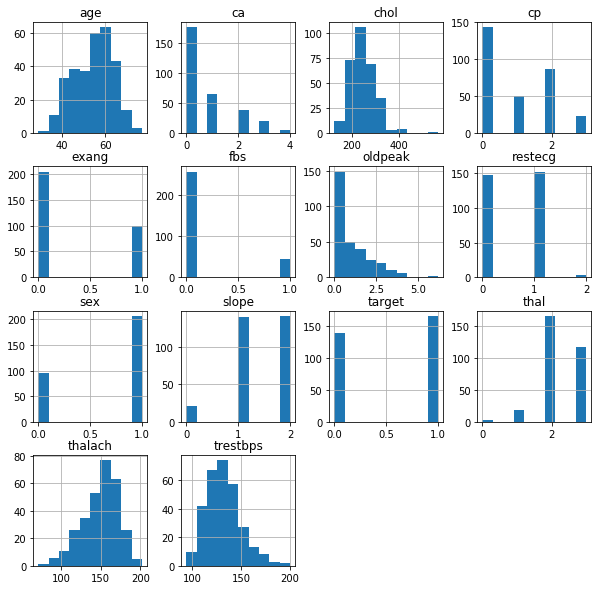

In [9]:
dataset.hist(figsize=(10,10))
plt.show()

Text(0.5, 1.0, 'Count of each Target Class')

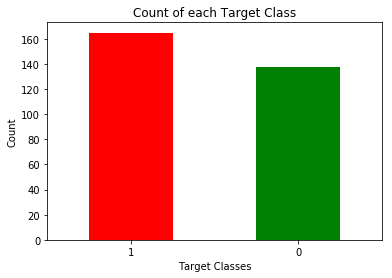

In [10]:
# Checking the dataset is balanced or not

dataset['target'].value_counts().plot.bar(color=['red', 'green'])
plt.xticks(rotation=0)
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

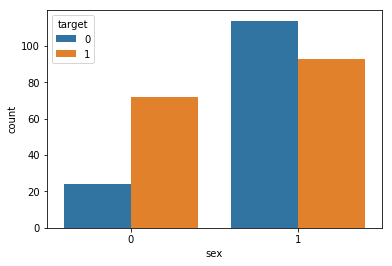

In [11]:
# Person has 'heart disease' on the basis of 'sex'

sns.countplot(x='sex', hue='target', data = dataset)

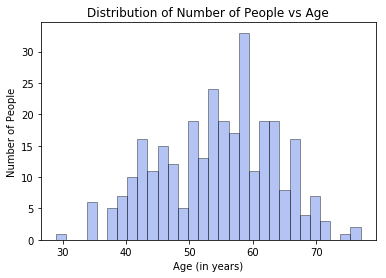

In [12]:
# Person has 'heart disease' on the basis of 'age'

# plt.figure(figsize=(15,7))
sns.distplot(dataset['age'], hist=True, bins=int(180/6), color='royalblue', kde=False, hist_kws={'edgecolor':'black'})

plt.title('Distribution of Number of People vs Age')
plt.xlabel('Age (in years)')
plt.ylabel('Number of People')
plt.show()

Text(0.5, 0, 'Chest pain type')

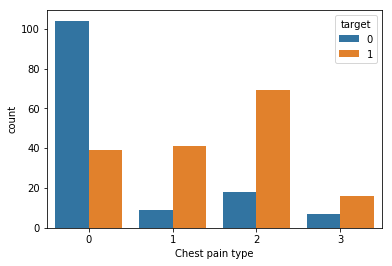

In [13]:
# Person has 'heart disease' on the basis of 'chest pain type'

sns.countplot(x='cp', hue ='target', data = dataset)
plt.xlabel('Chest pain type')

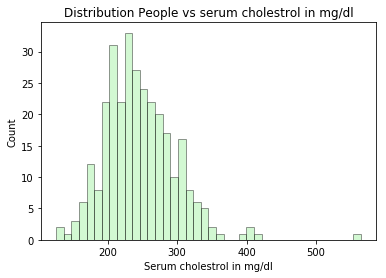

In [14]:
# PEople affected bcoz of Cholestrol level

sns.distplot(dataset['chol'], hist=True, kde=False, bins=int(200/5), color='lightgreen', hist_kws={'edgecolor':'black'})

plt.title('Distribution People vs serum cholestrol in mg/dl')
plt.xlabel('Serum cholestrol in mg/dl')
plt.ylabel('Count')
plt.show()

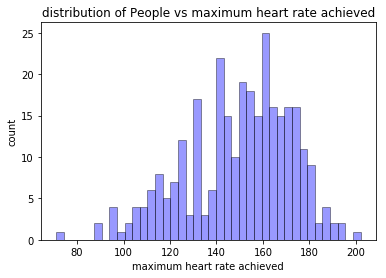

In [15]:
# max heart rate distribution 

sns.distplot(dataset['thalach'], hist=True, kde=False, 
             bins=int(200/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('distribution of People vs maximum heart rate achieved')
plt.xlabel('maximum heart rate achieved')
plt.ylabel('count')
plt.show()

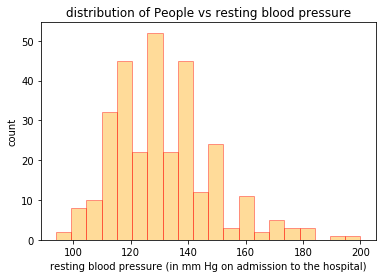

In [16]:
# resting heart rate distribution

sns.distplot(dataset['trestbps'], hist=True, kde=False, 
             bins=int(100/5), color = 'orange',
             hist_kws={'edgecolor':'red'})

plt.title('distribution of People vs resting blood pressure')
plt.xlabel('resting blood pressure (in mm Hg on admission to the hospital)')
plt.ylabel('count')
plt.show()

### Data Preprocessing , Split the data, Create the model, Predict and check accuracy

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor      
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [18]:
# We already did - splitting the data and train-testing, just following the data preprocessing steps (convention)

X = dataset.drop(['target'], axis=1)          
y = dataset['target']                        

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

### Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

acc = accuracy_score(y_test, prediction)
print(f'Accuracy of Decision Tree : {acc:0.2%}')
print('Confusion matrix : \n', confusion_matrix(y_test, prediction) )

Accuracy of Decision Tree : 81.97%
Confusion matrix : 
 [[21  6]
 [ 5 29]]


### Gaussian Naive Bayes

In [20]:
model = GaussianNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

acc = accuracy_score(y_test, prediction)
print(f'Accuracy of Naive Bayes : {acc:0.2%}')
print('Confusion matrix : \n', confusion_matrix(y_test, prediction) )

Accuracy of Naive Bayes : 85.25%
Confusion matrix : 
 [[21  6]
 [ 3 31]]


## Random forest , SVM , Logistic Regression

In [21]:
# Random forest

model = RandomForestClassifier(n_estimators=100)                   
model.fit(X_train, y_train)
prediction = model.predict(X_test)
acc = accuracy_score(y_test, prediction)
print(f'Accuracy of Random Forest : {acc:0.2%}')
print('Confusion matrix : \n', confusion_matrix(y_test, prediction) )

Accuracy of Random Forest : 85.25%
Confusion matrix : 
 [[23  4]
 [ 5 29]]


In [22]:
# SVM

model = SVC(kernel='linear')                                         
model.fit(X_train, y_train)
prediction = model.predict(X_test)
acc = accuracy_score(y_test, prediction)
print(f'Accuracy of SVM : {acc:0.2%}')
print('Confusion matrix : \n', confusion_matrix(y_test, prediction) )

Accuracy of SVM : 81.97%
Confusion matrix : 
 [[20  7]
 [ 4 30]]


In [23]:
# Logistic Regression

model = LogisticRegression(solver='liblinear')                       
model.fit(X_train, y_train)
prediction = model.predict(X_test)
acc = accuracy_score(y_test, prediction)
print(f'Accuracy of Logistic Regression : {acc:0.2%}')
print('Confusion matrix : \n', confusion_matrix(y_test, prediction) )

Accuracy of Logistic Regression : 85.25%
Confusion matrix : 
 [[22  5]
 [ 4 30]]


### Using ANN Multilayer perceptron Classifier

In [24]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

ann_clf = MLPClassifier()

parameters = {'solver':['lbfgs', 'sgd', 'adam'], 'alpha':[1e-4], 'hidden_layer_sizes':(9,14,14,2),
              'activation':['identity', 'logistic', 'tanh', 'relu'], 'random_state':[1]}

acc_scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(ann_clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)
ann_clf = grid_obj.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [25]:
ann_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=9, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [26]:
ann_pred = ann_clf.predict(X_test)

acc = accuracy_score(y_test, ann_pred)
print(f'Accuracy of ANN MLPClassifier : {acc:0.2%}')

Accuracy of ANN MLPClassifier : 80.33%
